In [ ]:
# Linear regression model uses advertising expense data to predict revenue

# Is there a relationship between ads and sales?
# How strong is that relationship?
# Which ad types contribute to sales?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# load the data
url = "https://raw.githubusercontent.com/babdelfa/ML/main/advertising_.csv"
df = pd.read_csv(url)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


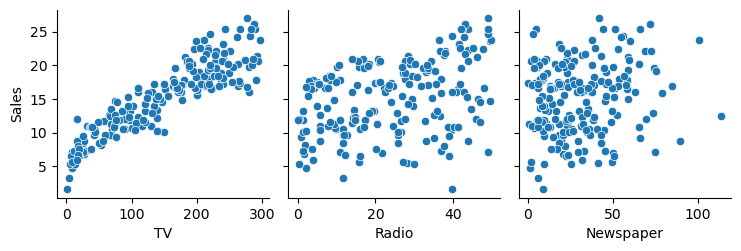

In [3]:
# Visualize the relationship between the features TV, Radio, and Newspaper and the target of sales using scatterplots
sns.pairplot(data=df,y_vars="Sales", x_vars=["TV", "Radio", "Newspaper"])

In [5]:
# Correlation matrix
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [11]:
# Prepare the feature and target data.
# X represents the feature TV  
# Y represents the target Sales

X = df[["TV"]]
y = df['Sales']


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=433)

In [19]:
# fit the model using the training data

model = LinearRegression()  
model.fit(X_train,y_train)

LinearRegression()

In [23]:
# Review the r-squared score (accuracy score) using test data
model.score(X_test,y_test)

0.7758220404359538

In [29]:
# y-intercept
model.intercept_

7.15706714972865

In [31]:
# Slope; feature's beta coef. 
model.coef_

array([0.0549175])

In [25]:
# Determine Predicted Sales 
model2.predict(X_test.values)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 9.32630848, 14.35675166, 22.18798745, 19.06318159,  7.62935767,
       21.74315569, 18.0801583 , 22.61085222, 18.27786131, 20.19448213,
       14.06019715, 13.52749738, 15.38370895,  7.1955094 , 22.54495121,
       12.90143786, 11.25940455, 16.13607873, 11.28137155, 10.57842753,
       18.72818482, 15.75714797, 12.33029584, 18.0911418 , 10.09515351,
       16.19099623, 19.69473286,  7.61837417, 17.50352453, 19.3707196 ,
       13.77462614, 13.35725313, 19.15104959, 20.32628413, 19.22793409,
       17.65180179,  7.38222891, 19.4585876 , 17.47057403,  8.53549645])

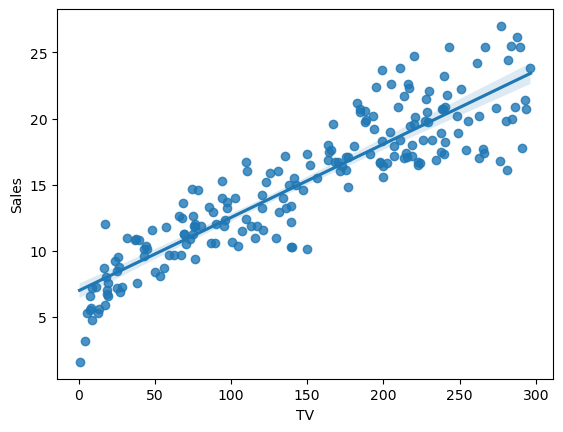

In [27]:
# Regression plot
sns.regplot(x="TV", y="Sales", data=df)
plt.show()

In [39]:
# Prediction model when $50,000 is spent for TV advertisement 
(model.intercept_ + (model.coef_ * 50))

array([9.90294225])

In [95]:
# # Multi-variate regression model using the two best features to predict the target (Sales).
X1 = df[["TV", "Radio"]]

In [97]:
# Split the data
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=100)

model2 = LinearRegression()
model2.fit(X1_train, y_train)

LinearRegression()

In [99]:
# What is the accuracy score of the model? Test data
model2.score(X1_test, y_test)

0.8702269065022538

In [101]:
# Predict Sales by entering average value for each feature.

model2.predict([[X1.TV.mean(), X1.Radio.mean()]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.00800475])